In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_data(X, y, feature_names, resolution=0.02):
    axis_max = abs(x).max().round() + 1
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    plt.xlim(-axis_max, axis_max)
    plt.ylim(-axis_max, axis_max)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Data')

def plot_decision_boundaries(X, y, clf, feature_names, resolution=0.02):
    # Plot the decision surface
    axis_max = abs(x).max().round() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(-axis_max, axis_max, resolution),
                           np.arange(-axis_max, axis_max, resolution))
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    plt.figure(figsize=(8, 8))
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    
    # Plot class sample
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    
    plt.xlim(-axis_max, axis_max)
    plt.ylim(-axis_max, axis_max)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Nearest Neighbor')

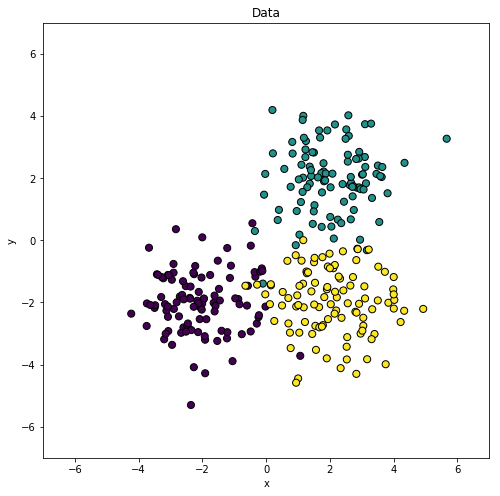

In [3]:
def get_2d(n_samples, mean=2):
    k1 = np.random.multivariate_normal([-mean, -mean],[[1,0],[0,1]], size=n_samples)
    k2 = np.random.multivariate_normal([mean, mean],[[1,0],[0,1]], size=n_samples)
    k3 = np.random.multivariate_normal([mean, -mean],[[1,0],[0,1]], size=n_samples)
    x = np.concatenate([k1,k2,k3])
    y = np.concatenate([np.zeros(n_samples), np.ones(n_samples), np.ones(n_samples)*2])
    return x, y
    
n_samples = 100
mean = 2
x, y = get_2d(n_samples, mean)
plot_data(x, y, ['x','y'])

K=200, accuracy=0.9533333333333334, error=0.046666666666666634


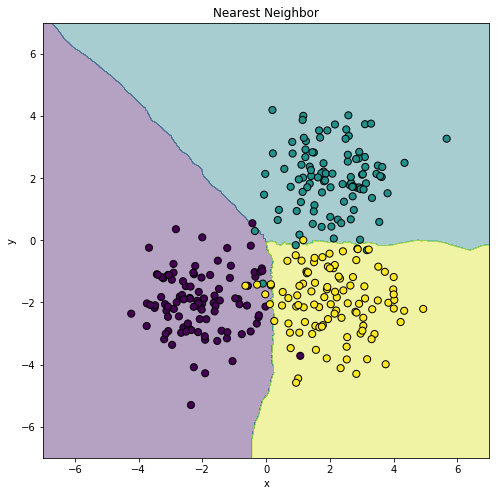

In [4]:
k = 200
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x, y)
plot_decision_boundaries(x, y, knn, ['x','y'])
accuracy = knn.score(x, y)
print('K={0}, accuracy={1}, error={2}'.format(k, accuracy, 1-accuracy))

# Train - Test

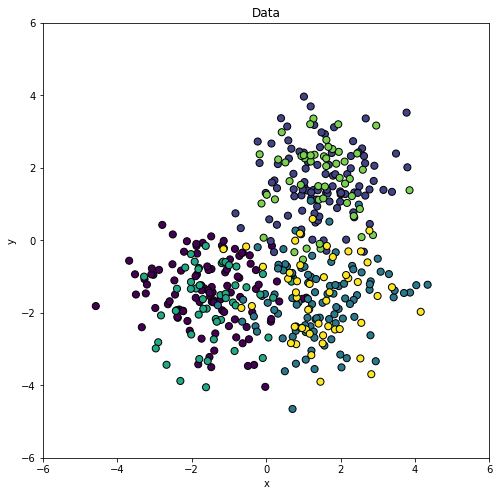

In [5]:
n_train = 100
n_test = 50
mean = 1.5
x_train, y_train = get_2d(n_samples, mean)
x_test, y_test = get_2d(n_test, mean)
y = np.concatenate([y_train, y_test+3])
x = np.concatenate([x_train, x_test])
plot_data(x, y, ['x','y'])

K=3, Train accuracy=0.9433333333333334, Test accuracy=0.8933333333333333


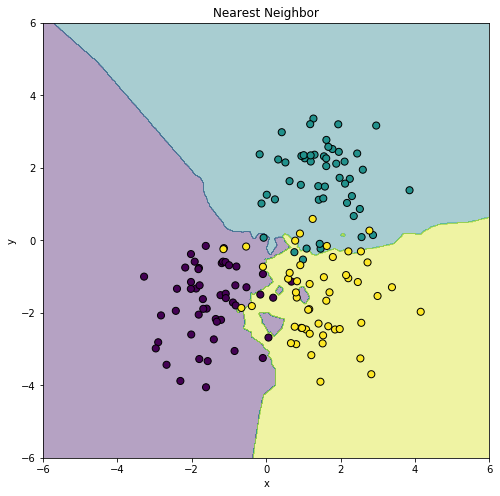

In [6]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
plot_decision_boundaries(x_test, y_test, knn, ['x','y'])
print('K={0}, Train accuracy={1}, Test accuracy={2}'.format(k, knn.score(x_train, y_train), knn.score(x_test, y_test)))

# Confusion Matrix

In [7]:
import pandas as pd
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(y, y_pred):
    rows = ['{0}_true'.format(int(i)) for i in np.unique(y_test)]
    columns = ['{0}_pred'.format(int(i)) for i in np.unique(y_test)]
    return pd.DataFrame(confusion_matrix(y, y_pred), index=rows, columns=columns)

k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
get_confusion_matrix(y_test, y_pred)

,0_pred,1_pred,2_pred
0_true,45,0,5
1_true,0,46,4
2_true,4,7,39


In [8]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
get_confusion_matrix(y_train, y_pred_train)

,0_pred,1_pred,2_pred
0_true,100,0,0
1_true,0,100,0
2_true,0,0,100
